In [2]:
import pandas as pd

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
!pip install pandas

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("placement.csv")

In [6]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


## we have check the assumption


### 1. linearity between  independent and dependent feature

Text(0, 0.5, 'package')

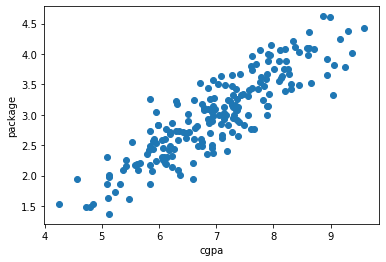

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("cgpa")
plt.ylabel("package")

## 2.seperate x and y 

In [53]:
x=df.iloc[:,0:1]

In [54]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [56]:
y=df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

## 3. splitting data train and test data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
train_test_split(x,y,test_size=0.15)

[     cgpa
 54   6.86
 24   6.53
 74   6.85
 12   8.94
 125  7.33
 ..    ...
 181  8.22
 72   7.78
 176  6.29
 23   6.19
 97   5.98
 
 [170 rows x 1 columns],
      cgpa
 59   7.56
 64   7.36
 17   5.38
 32   6.96
 39   7.43
 8    6.09
 56   5.84
 96   7.11
 137  7.14
 172  6.93
 91   6.22
 85   4.79
 31   8.10
 49   8.87
 179  7.14
 15   7.25
 22   6.14
 42   5.95
 106  6.13
 44   5.09
 111  5.42
 103  7.05
 67   6.51
 140  7.91
 130  6.68
 190  6.19
 185  6.31
 51   9.26
 7    6.75
 150  6.30,
 54     3.09
 24     2.71
 74     3.44
 12     3.65
 125    3.16
        ... 
 181    3.89
 72     3.62
 176    3.23
 23     2.48
 97     2.84
 Name: package, Length: 170, dtype: float64,
 59     3.31
 64     2.92
 17     2.09
 32     3.08
 39     3.33
 8      2.31
 56     2.74
 96     2.61
 137    3.13
 172    2.51
 91     2.14
 85     1.48
 31     3.89
 49     4.62
 179    3.03
 15     3.23
 22     2.30
 42     2.54
 106    2.19
 44     1.86
 111    2.25
 103    3.00
 67     2.89
 140    3.15

In [59]:
df.shape

(200, 2)

In [60]:
#15 % of the data point 
200*0.15

30.0

### random sampling 

when we select the random sampling every time if you run x_train and x_test it will give me diffrent set of sample .so to avoid that we are going to use random_state={value}

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [62]:
x_train.shape  # independent data for training

(170, 1)

In [63]:
x_test.shape # independent data for testing

(30, 1)

In [64]:
y_train.shape  # dependent data for training

(170,)

In [65]:
y_test.shape # dependent data for training

(30,)

validation term is used on this segrigated data not for new data for validatation 

In [66]:
x_train # data not changed bcz of random_state range 2power32 -1

,cgpa
9,8.31
18,6.94
55,8.20
75,6.97
150,6.30
...,...
106,6.13
14,7.73
92,7.90
179,7.14


### we must have take 2d array for x_train and y_train otherwise it will show above error

In [71]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

## 4.Model Building

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model=LinearRegression()

### Fit is for train data below

In [69]:
model.fit(x_train,y_train)

LinearRegression()

## 5.model score

### this is training acuracy

In [75]:
#R2 value
model.score(x_train,y_train)

0.7741811633951949

 r2 score range [0-1] 
 
if we getting r2 value near to 1 it will be best model

### we are performing for test data 

In [76]:
x_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [78]:
y_predicted=model.predict(x_test)

In [79]:
y_predicted  # predicted value

array([2.78511178, 3.13682871, 3.1992301 , 2.39935773, 3.52258277,
       3.76084262, 3.16519298, 2.55252478, 3.17653869, 3.48854564,
       1.92283802, 2.35964775, 3.68142267, 2.76242037, 3.47152708,
       3.04606305, 2.33695634, 3.20490296, 2.18946214, 3.31268718,
       2.46175912, 2.90424171, 3.31836003, 2.87587744, 3.33537859,
       2.2064807 , 1.44064545, 2.71703754, 3.18221154, 2.33695634])

In [80]:
y_test  # this is actual value

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
Name: package, dtype: float64

### validation 

In [89]:
from sklearn.metrics import r2_score

In [90]:
r2_score(y_test,y_predicted)

0.7804129897987837

In [94]:
model.coef_

array([0.56728537])

In [93]:
model.intercept_   

-0.9759902354422221

#### linear regression    y=mx+c

0.56x-0.911

In [95]:
model.predict([[7.8]])    # array is package values

array([3.44883567])

In [96]:
model.predict([[9.3]])  # array is package values

array([4.29976373])

In [ ]:
y=0.56x-0.911

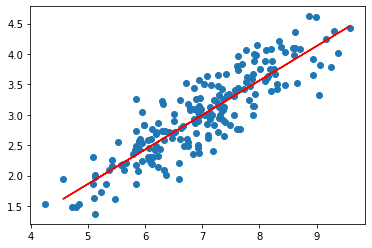

In [113]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train['cgpa'],model.predict(x_train),color='red')

In [105]:
y=0.56*(7.8)-0.911

In [106]:
y


3.4570000000000003

In [110]:
model.predict(x_train)

array([3.73815121, 2.96097025, 3.67574982, 2.97798881, 2.59790761,
       3.3467243 , 2.48445054, 3.07442732, 4.16361524, 2.96097025,
       3.09711874, 3.1141373 , 3.91400967, 2.72838325, 1.92851087,
       2.95529739, 3.08010018, 3.26730435, 1.77534382, 3.34105145,
       2.33695634, 2.85318603, 3.49989135, 2.37666631, 3.06308161,
       3.81189831, 3.51123706, 3.38643428, 2.95529739, 3.05740876,
       4.30543658, 2.41637629, 3.61902128, 4.09554099, 2.92126027,
       3.21624867, 2.39935773, 3.62469413, 3.05740876, 2.22349926,
       4.27707231, 2.87020459, 2.16109787, 2.93260598, 3.22192152,
       2.96097025, 3.73815121, 3.10279159, 3.53392847, 2.09869648,
       3.46018138, 4.12390526, 2.46743197, 2.57521619, 3.15384727,
       1.7413067 , 3.16519298, 2.42204914, 2.53550622, 2.1327336 ,
       2.50714195, 2.85885888, 2.83049461, 2.62627188, 2.77376608,
       3.49989135, 3.96506536, 2.84184032, 2.09869648, 1.99091226,
       2.96097025, 2.97231596, 2.95529739, 2.33695634, 3.43181

In [116]:
x_train['cgpa']

9      8.31
18     6.94
55     8.20
75     6.97
150    6.30
       ... 
106    6.13
14     7.73
92     7.90
179    7.14
102    5.13
Name: cgpa, Length: 170, dtype: float64

In [ ]:
--------------------------- Happy Learning----------------------------------